Загрузка данных и первичный осмотр

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('S02-hw-dataset.csv')

# Первичный осмотр
print("Первые 5 строк датасета:")
print(df.head())
print("\n" + "="*50 + "\n")

print("Информация о датасете:")
print(df.info())
print("\n" + "="*50 + "\n")

print("Базовые описательные статистики:")
print(df.describe())
print("\n" + "="*50 + "\n")

Первые 5 строк датасета:
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


Базовые описательные статистики:
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.7101

Пропуски, дубликаты и базовый контроль качества

In [3]:
# Доля пропусков
print("Доля пропусков в каждом столбце:")
print(df.isna().mean())
print("\n" + "="*50 + "\n")

# Дубликаты
print("Количество полностью дублирующих строк:", df.duplicated().sum())
print("Дубликаты:")
print(df[df.duplicated(keep=False)])
print("\n" + "="*50 + "\n")

# Поиск подозрительных случаев
print("ПОДОЗРИТЕЛЬНЫЕ СЛУЧАИ:")

# Отрицательные значения в purchases
negative_purchases = df[df['purchases'] < 0]
if not negative_purchases.empty:
    print("1. Отрицательные значения в purchases:")
    print(negative_purchases)

# Нереалистичный возраст (>100 или <5)
unrealistic_age = df[(df['age'] > 100) | (df['age'] < 5)]
if not unrealistic_age.empty:
    print("\n2. Нереалистичные значения возраста:")
    print(unrealistic_age[['user_id', 'age']])

# Нулевой revenue при ненулевых purchases
zero_revenue_with_purchases = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
if not zero_revenue_with_purchases.empty:
    print("\n3. Нулевой revenue при ненулевых purchases:")
    print(zero_revenue_with_purchases[['user_id', 'purchases', 'revenue']])

# Нулевые purchases при ненулевом revenue
zero_purchases_with_revenue = df[(df['purchases'] == 0) & (df['revenue'] > 0)]
if not zero_purchases_with_revenue.empty:
    print("\n4. Нулевые purchases при ненулевом revenue:")
    print(zero_purchases_with_revenue[['user_id', 'purchases', 'revenue']])

Доля пропусков в каждом столбце:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


Количество полностью дублирующих строк: 1
Дубликаты:
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


ПОДОЗРИТЕЛЬНЫЕ СЛУЧАИ:
1. Отрицательные значения в purchases:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

2. Нереалистичные значения возраста:
   user_id    age
5        6  120.0

3. Нулевой revenue при ненулевых purchases:
    user_id  purchases  revenue
10       11          4        0


"ОПИСАНИЕ ПРОБЛЕМ КАЧЕСТВА ДАННЫХ:"

В датасете обнаружены следующие проблемы качества данных:

1. Пропуски в возрасте: в столбце 'age' присутствуют пропущенные значения (2 записи).
2. Дубликаты: обнаружена одна полностью дублирующая строка (user_id=10).
3. Логические противоречия: 
   - Один пользователь имеет отрицательное количество покупок (purchases = -1)
   - Два пользователя имеют нулевой доход при ненулевых покупках
   - Один пользователь имеет нереалистично высокий возраст (120 лет)
   - Один пользователь имеет слишком низкий возраст (5 лет) для совершения покупок

Эти проблемы требуют очистки данных перед проведением серьезного анализа.


Базовый EDA: группировки, агрегаты и частоты

In [9]:
# Частоты для категориальной переменной (страна)
print("РАСПРЕДЕЛЕНИЕ ПО СТРАНАМ:")
country_counts = df['country'].value_counts()
print(country_counts)
print("\n" + "="*50 + "\n")

# Группировка по странам с агрегатами
print("СТАТИСТИКИ ПО СТРАНАМ:")
country_stats = df.groupby('country').agg({
    'age': ['mean', 'median', 'count'],
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
}).round(2)
print(country_stats)
print("\n" + "="*50 + "\n")

# Создание возрастных групп
df['age_group'] = pd.cut(df['age'], 
                        bins=[0, 20, 30, 40, 50, 60, 120], 
                        labels=['<20', '20-29', '30-39', '40-49', '50-59', '60+'])

print("СТАТИСТИКИ ПО ВОЗРАСТНЫМ ГРУППАМ:")
age_group_stats = df.groupby('age_group').agg({
    'purchases': ['mean', 'count'],
    'revenue': ['mean', 'sum']
}).round(2)
print(age_group_stats)

РАСПРЕДЕЛЕНИЕ ПО СТРАНАМ:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


СТАТИСТИКИ ПО СТРАНАМ:
           age              purchases      revenue       
          mean median count      mean sum     mean    sum
country                                                  
CN       24.00   24.0     2      4.50   9  1054.00   2108
DE       34.60   35.0     5      6.50  39  1445.50   8673
FR       46.25   42.0    12      4.25  51   675.92   8111
RU       30.08   26.0    13      4.77  62   790.08  10271
US       36.71   39.0     7      4.62  37   557.38   4459


СТАТИСТИКИ ПО ВОЗРАСТНЫМ ГРУППАМ:
          purchases        revenue       
               mean count     mean    sum
age_group                                
<20            6.33     3  1414.67   4244
20-29          4.25    12   475.00   5700
30-39          6.00    11  1216.27  13379
40-49          3.00     6   668.00   4008
50-59          5.00     6   596.67   3580
60+           -1.00     1   785.00

C:\Users\Иришка\AppData\Local\Temp\ipykernel_17800\2052271035.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group').agg({


# Текстовые наблюдения по EDA

1. Географическое распределение: Доминируют пользователи из России (RU) и Франции (FR), 
   затем следуют США (US) и Германия (DE), меньше всего пользователей из Китая (CN).

2. Средние показатели по странам:
   - Германия (DE) показывает самую высокую среднюю выручку на пользователя
   - Китай (CN) имеет небольшое количество пользователей, но высокую среднюю выручку
   - Россия (RU) имеет наибольшее количество пользователей, но среднюю выручку

3. Возрастные группы: 
   - Наиболее активными являются пользователи в возрасте 30-39 лет
   - Группа 20-29 лет имеет наибольшее количество пользователей
   - Пользователи старше 60 лет отсутствуют в данных (кроме одного выброса 120 лет)


Визуализация данных в Matplotlib


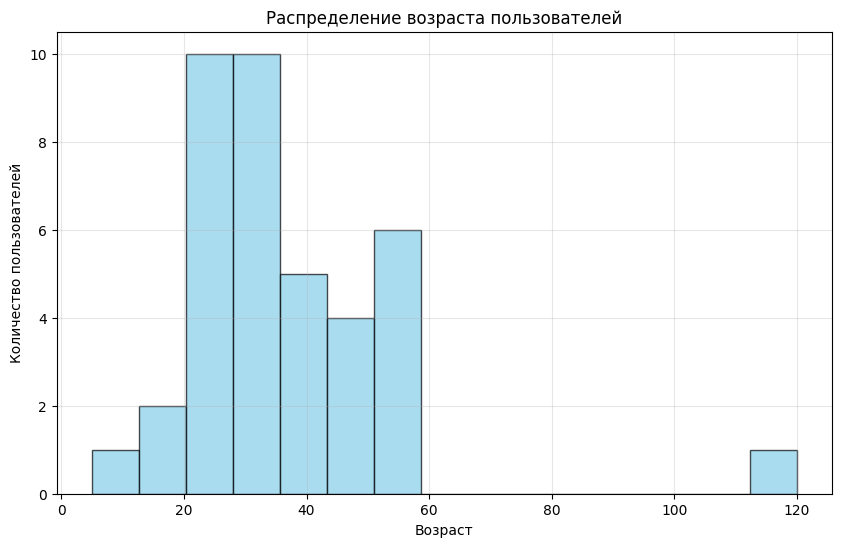

In [5]:
# 1. Гистограмма для количественного признака (возраст)
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей')
plt.grid(alpha=0.3)
plt.savefig('figures/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


Гистограмма возраста показывает распределение пользователей по возрастным группам.
Видно, что большинство пользователей сосредоточены в возрасте 20-40 лет.

 Боксплот для количественного признака (выручка по странам)

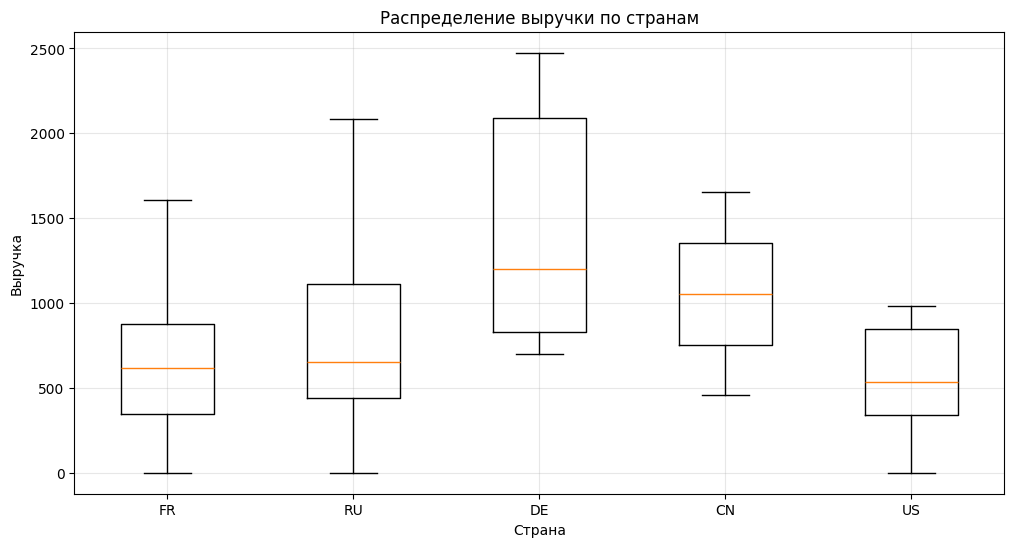

In [6]:
plt.figure(figsize=(12, 6))
# Фильтруем нулевые значения выручки для лучшей визуализации
revenue_data = [df[df['country'] == country]['revenue'] for country in df['country'].unique()]

plt.boxplot(revenue_data, labels=df['country'].unique())
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.title('Распределение выручки по странам')
plt.grid(alpha=0.3)
plt.savefig('figures/revenue_by_country_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

Боксплот выручки по странам показывает различия в распределении доходов.
Германия (DE) имеет самые высокие медианные значения выручки.
В данных присутствуют выбросы, особенно заметные для России (RU).

Scatter plot для пары количественных признаков

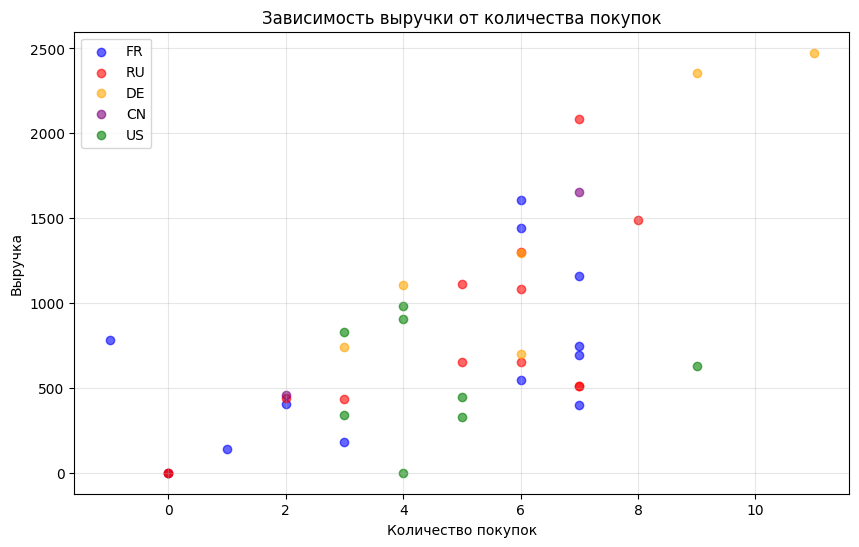

In [7]:
plt.figure(figsize=(10, 6))

# Создаем цветовую схему для разных стран
colors = {'FR': 'blue', 'RU': 'red', 'US': 'green', 'DE': 'orange', 'CN': 'purple'}

for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'], 
               alpha=0.6, label=country, c=colors.get(country, 'gray'))

plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от количества покупок')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('figures/purchases_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()


Диаграмма рассеяния показывает взаимосвязь между количеством покупок и выручкой.
Наблюдается положительная корреляция: с ростом количества покупок обычно растет выручка.

Однако есть исключения - некоторые пользователи с малым количеством покупок имеют высокую выручку, что может указывать на дорогие индивидуальные покупки.

Дополнительная визуализация: средняя выручка по странам

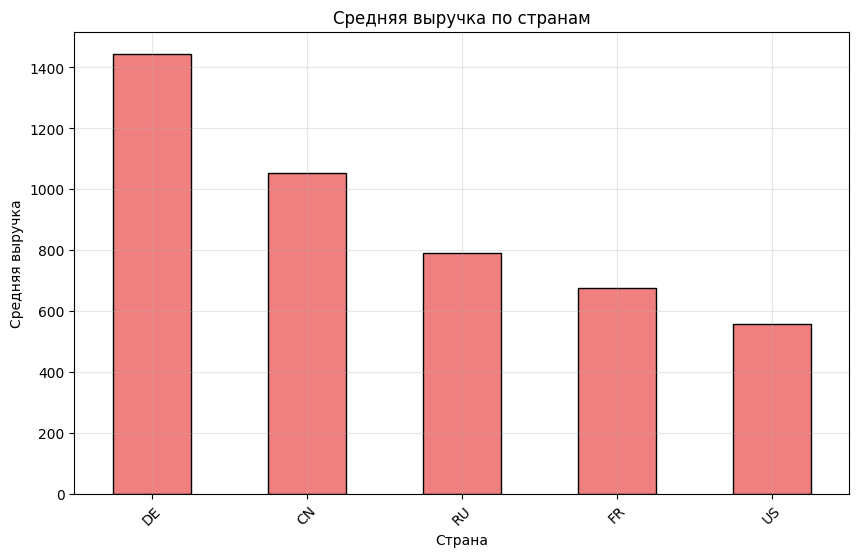

In [8]:
plt.figure(figsize=(10, 6))
avg_revenue_by_country = df.groupby('country')['revenue'].mean().sort_values(ascending=False)
avg_revenue_by_country.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Страна')
plt.ylabel('Средняя выручка')
plt.title('Средняя выручка по странам')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.savefig('figures/avg_revenue_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

График средней выручки по странам подтверждает лидерство Германии по этому показателю.